In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [327]:
df = pd.read_csv('top50MusicFrom2010-2019.csv')


In [328]:
df.head()

,title,artist,the genre of the track,year,Beats.Per.Minute -The tempo of the song,"Energy- The energy of a song - the higher the value, the more energtic","Danceability - The higher the value, the easier it is to dance to this song","Loudness/dB - The higher the value, the louder the song","Liveness - The higher the value, the more likely the song is a live recording","Valence - The higher the value, the more positive mood for the song",Length - The duration of the song,Acousticness - The higher the value the more acoustic the song is,Speechiness - The higher the value the more spoken word the song contains,Popularity- The higher the value the more popular the song is
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   title                                                                          603 non-null    object
 1   artist                                                                         603 non-null    object
 2   the genre of the track                                                         603 non-null    object
 3   year                                                                           603 non-null    int64 
 4   Beats.Per.Minute -The tempo of the song                                        603 non-null    int64 
 5   Energy- The energy of a song - the higher the value, the more energtic         603 non-null    int64 
 6   Danceability - The higher the valu

In [330]:
df.describe()

,year,Beats.Per.Minute -The tempo of the song,"Energy- The energy of a song - the higher the value, the more energtic","Danceability - The higher the value, the easier it is to dance to this song","Loudness/dB - The higher the value, the louder the song","Liveness - The higher the value, the more likely the song is a live recording","Valence - The higher the value, the more positive mood for the song",Length - The duration of the song,Acousticness - The higher the value the more acoustic the song is,Speechiness - The higher the value the more spoken word the song contains,Popularity- The higher the value the more popular the song is
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [331]:
df.isnull().sum()
#Dataset has no missing or null values

title                                                                            0
artist                                                                           0
the genre of the track                                                           0
year                                                                             0
Beats.Per.Minute -The tempo of the song                                          0
Energy- The energy of a song - the higher the value, the more energtic           0
Danceability - The higher the value, the easier it is to dance to this song      0
Loudness/dB - The higher the value, the louder the song                          0
Liveness - The higher the value, the more likely the song is a live recording    0
Valence - The higher the value, the more positive mood for the song              0
Length - The duration of the song                                                0
Acousticness - The higher the value the more acoustic the song is                0
Spee

In [332]:
df.dtypes

title                                                                            object
artist                                                                           object
the genre of the track                                                           object
year                                                                              int64
Beats.Per.Minute -The tempo of the song                                           int64
Energy- The energy of a song - the higher the value, the more energtic            int64
Danceability - The higher the value, the easier it is to dance to this song       int64
Loudness/dB - The higher the value, the louder the song                           int64
Liveness - The higher the value, the more likely the song is a live recording     int64
Valence - The higher the value, the more positive mood for the song               int64
Length - The duration of the song                                                 int64
Acousticness - The higher the va

In [333]:
df.shape

(603, 14)

In [334]:
df.columns

Index(['title', 'artist', 'the genre of the track', 'year',
       'Beats.Per.Minute -The tempo of the song',
       'Energy- The energy of a song - the higher the value, the more energtic',
       'Danceability - The higher the value, the easier it is to dance to this song',
       'Loudness/dB - The higher the value, the louder the song',
       'Liveness - The higher the value, the more likely the song is a live recording',
       'Valence - The higher the value, the more positive mood for the song',
       'Length - The duration of the song',
       'Acousticness - The higher the value the more acoustic the song is',
       'Speechiness - The higher the value the more spoken word the song contains',
       'Popularity- The higher the value the more popular the song is'],
      dtype='object')

In [335]:
df.rename(columns = {'the genre of the track':'Genre','Beats.Per.Minute -The tempo of the song':'Tempo',
                          'Energy- The energy of a song - the higher the value, the more energtic':'Energy',
                          'Danceability - The higher the value, the easier it is to dance to this song' : 'Danceability',
                          'Loudness/dB - The higher the value, the louder the song' : 'Loudness',
                          'Liveness - The higher the value, the more likely the song is a live recording' : 'Liveness',
                          'Valence - The higher the value, the more positive mood for the song':'Valence',
                          'Length - The duration of the song':'Duration',
                          'Acousticness - The higher the value the more acoustic the song is':'Acousticness',
                          'Speechiness - The higher the value the more spoken word the song contains':'Speechiness',
                          'Popularity- The higher the value the more popular the song is' : 'Popularity'}, inplace = True)


In [336]:
df.head()

,title,artist,Genre,year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [337]:
#Normalizing the data
for column in df.iloc[:,4:]:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
df.head() 


,title,artist,Genre,year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333,0.838384
1,Love The Way You Lie,Eminem,detroit hip hop,2010,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167,0.828283
2,TiK ToK,Kesha,dance pop,2010,0.582524,0.857143,0.783505,0.982759,0.391892,0.724490,0.227586,0.101010,0.291667,0.808081
3,Bad Romance,Lady Gaga,dance pop,2010,0.577670,0.938776,0.721649,0.965517,0.108108,0.724490,0.555172,0.000000,0.083333,0.797980
4,Just the Way You Are,Bruno Mars,pop,2010,0.529126,0.857143,0.659794,0.948276,0.121622,0.438776,0.300000,0.020202,0.083333,0.787879


In [338]:
new_df = df.copy(deep=True)
new_df.head()

,title,artist,Genre,year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333,0.838384
1,Love The Way You Lie,Eminem,detroit hip hop,2010,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167,0.828283
2,TiK ToK,Kesha,dance pop,2010,0.582524,0.857143,0.783505,0.982759,0.391892,0.724490,0.227586,0.101010,0.291667,0.808081
3,Bad Romance,Lady Gaga,dance pop,2010,0.577670,0.938776,0.721649,0.965517,0.108108,0.724490,0.555172,0.000000,0.083333,0.797980
4,Just the Way You Are,Bruno Mars,pop,2010,0.529126,0.857143,0.659794,0.948276,0.121622,0.438776,0.300000,0.020202,0.083333,0.787879


In [395]:
from dataprep.eda import create_report
report = create_report(new_df)
report.save('Report')
report.show_browser()

  0%|                                                                                         | 0/2654 [00:00<…

Report has been saved to Report.html!


In [340]:
#Checking for duplicate rows in the data (there are no duplicate rows)
df[df.duplicated()]


,title,artist,Genre,year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity


# Data Analysis and Visualization

In [341]:
#Finding total number of artists who produced Top tracks
unique_artists = len(df['artist'].unique())
print("There are " , unique_artists , "Unique artists")

There are  184 Unique artists


In [342]:
#Finding total number of unique Genres
unique_Genre = len(df['Genre'].unique())
print("There are " , unique_Genre , "Unique Genres")

There are  50 Unique Genres


array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'Tempo'}>,
        <AxesSubplot: title={'center': 'Energy'}>],
       [<AxesSubplot: title={'center': 'Danceability'}>,
        <AxesSubplot: title={'center': 'Loudness'}>,
        <AxesSubplot: title={'center': 'Liveness'}>],
       [<AxesSubplot: title={'center': 'Valence'}>,
        <AxesSubplot: title={'center': 'Duration'}>,
        <AxesSubplot: title={'center': 'Acousticness'}>],
       [<AxesSubplot: title={'center': 'Speechiness'}>,
        <AxesSubplot: title={'center': 'Popularity'}>, <AxesSubplot: >]],
      dtype=object)

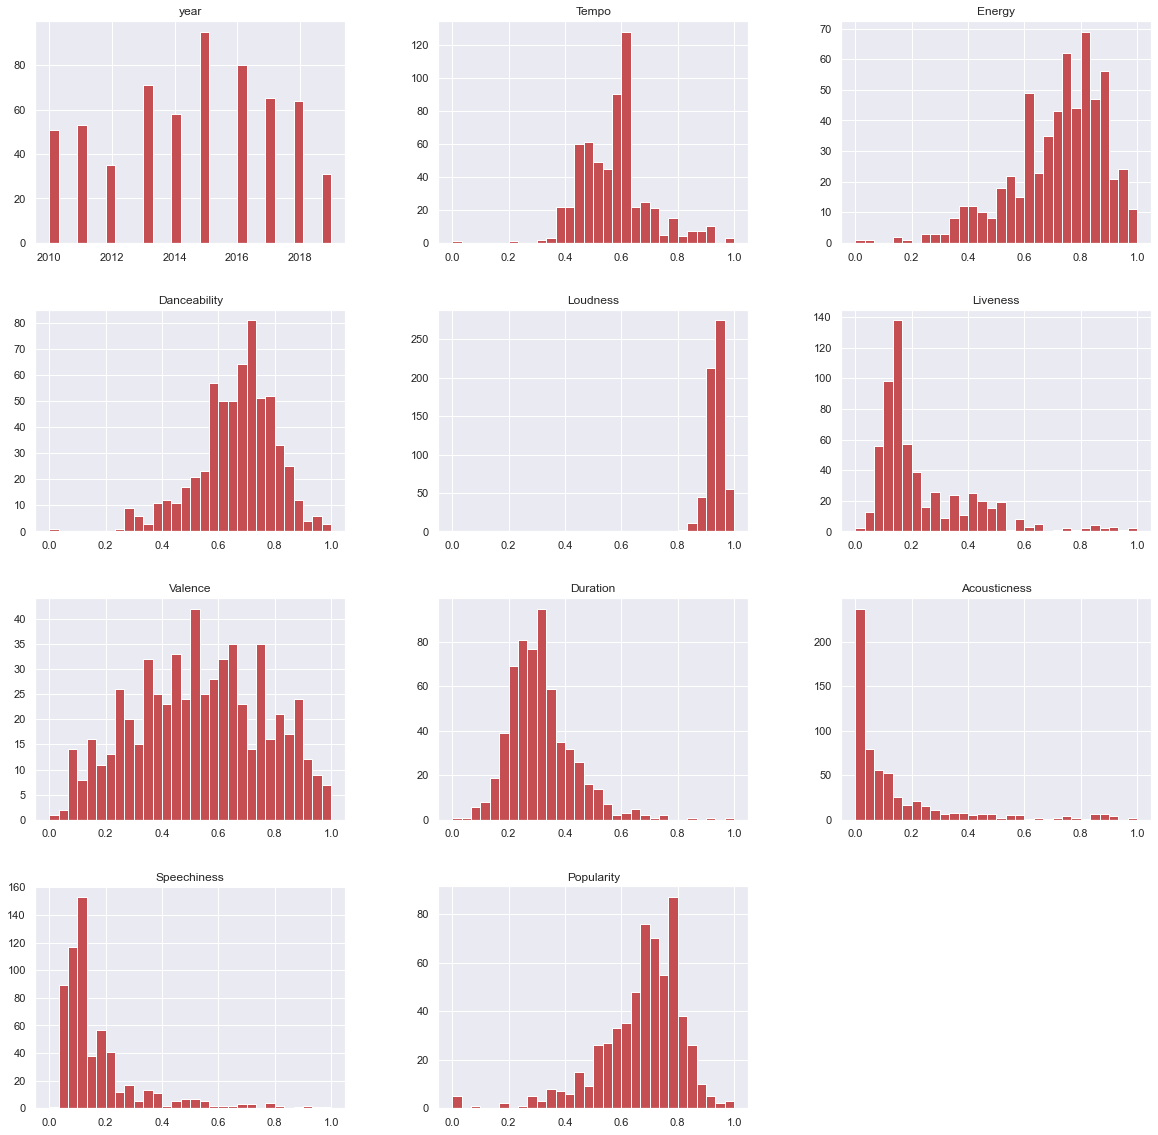

In [343]:
#Plotting histograms of each quantative variables
df.hist(bins=30, figsize=(20,20),color ='r')

<AxesSubplot: >

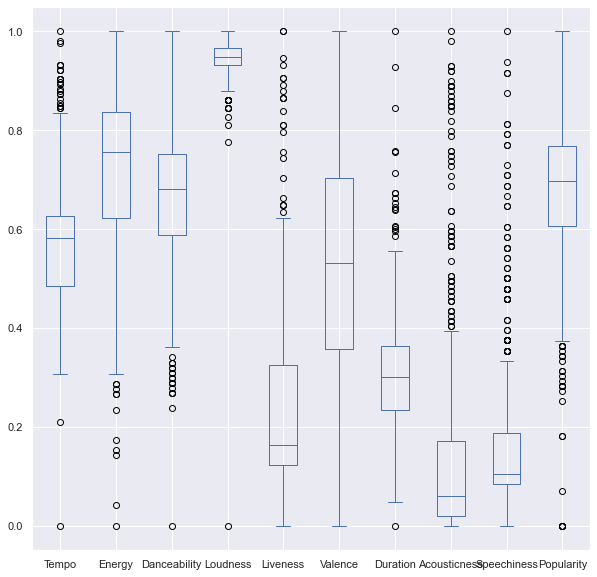

In [344]:
#Boxplots of all quantative variables
df1 = df.iloc[:,4:]
df1.boxplot(figsize=(10,10),color ='b')

In [345]:
#Top 5 artists based on the popularity factor
df2=df.groupby(by='artist')['Popularity'].sum().reset_index().rename(columns={0:'Popular'}).sort_values(['Popularity'])
df2 = df2.tail()
df2

,artist,Popularity
94,Lady Gaga,9.737374
145,Rihanna,9.909091
86,Katy Perry,10.666667
115,Maroon 5,11.343434
83,Justin Bieber,11.616162


([<matplotlib.patches.Wedge at 0x242a5063d30>,
 [Text(0.923571194907142, 0.5975083664165667, 'Lady Gaga'),
  Text(-0.17744727991335138, 1.0855931387270983, 'Rihanna'),
  Text(-1.0790710166346564, 0.21355500710367142, 'Katy Perry'),
  Text(-0.4964097934411815, -0.9816197415372634, 'Maroon 5'),
  Text(0.8518422242595812, -0.6959632353569329, 'Justin Bieber')],
 [Text(0.5037661063129865, 0.3259136544090363, '18%'),
  Text(-0.09678942540728255, 0.5921417120329626, '19%'),
  Text(-0.5885841908916307, 0.1164845493292753, '20%'),
  Text(-0.27076897824064444, -0.5354289499294164, '21%'),
  Text(0.46464121323249874, -0.37961631019469066, '22%')])

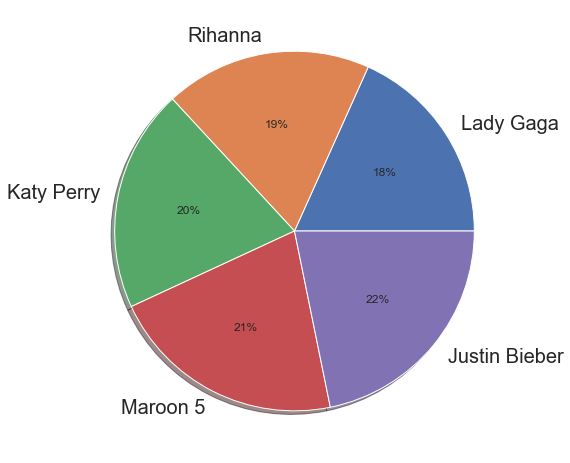

In [346]:
#Plotting the above derived data
sns.set(rc={'figure.figsize':(13.7,8.27)})

plt.rc('xtick', labelsize=20)
plt.pie(df2['Popularity'],labels=df2['artist'],shadow=True,autopct='%.0f%%')

In [347]:
#Finding top 10 artists who produced the most number of tracks
df3 = df.groupby(['artist'])['title'].count().reset_index().rename(columns={'title':'Number of songs'}).sort_values(['Number of songs'])
df3 = df3.tail(10)
df3

,artist,Number of songs
168,The Chainsmokers,11
141,Pitbull,11
46,Ed Sheeran,11
157,Shawn Mendes,11
20,Bruno Mars,13
94,Lady Gaga,14
145,Rihanna,15
115,Maroon 5,15
83,Justin Bieber,16
86,Katy Perry,17


<AxesSubplot: xlabel='artist', ylabel='Number of songs'>

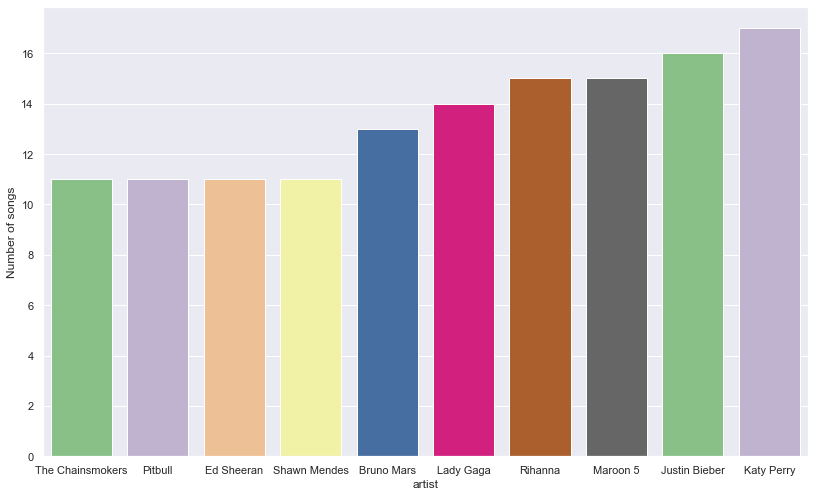

In [348]:
#Using barplot to visualize the data
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.barplot(data=df3,x='artist',y='Number of songs',palette='Accent')

In [349]:
#Number of tracks produced in each year
df4 = df.groupby(['year'])['title'].count().reset_index().rename(columns={'title':'Number of songs'}).sort_values(['Number of songs'])
df4 = df4.tail(10)
df4

,year,Number of songs
9,2019,31
2,2012,35
0,2010,51
1,2011,53
4,2014,58
8,2018,64
7,2017,65
3,2013,71
6,2016,80
5,2015,95


<AxesSubplot: xlabel='year', ylabel='Number of songs'>

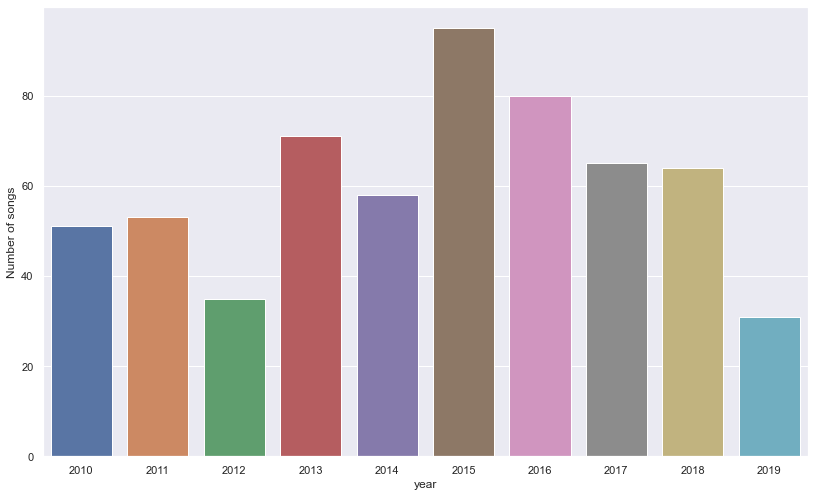

In [350]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.barplot(data=df4,x='year',y='Number of songs',palette='deep')

In [351]:
#Top 10 Genres with high Danceability factor in them
df5 = df.groupby(by='Genre')['Danceability'].sum().reset_index().rename(columns={0:'Popularity'})
df5 = df5.tail(10).sort_values(['Danceability'])
df5


,Genre,Danceability
40,house,0.515464
42,irish singer-songwriter,0.587629
44,metropopolis,0.701031
45,moroccan pop,0.773196
41,indie pop,0.979381
49,tropical house,1.515464
47,permanent wave,1.762887
43,latin,2.938144
46,neo mellow,4.896907
48,pop,42.340206


<AxesSubplot: xlabel='Genre', ylabel='Danceability'>

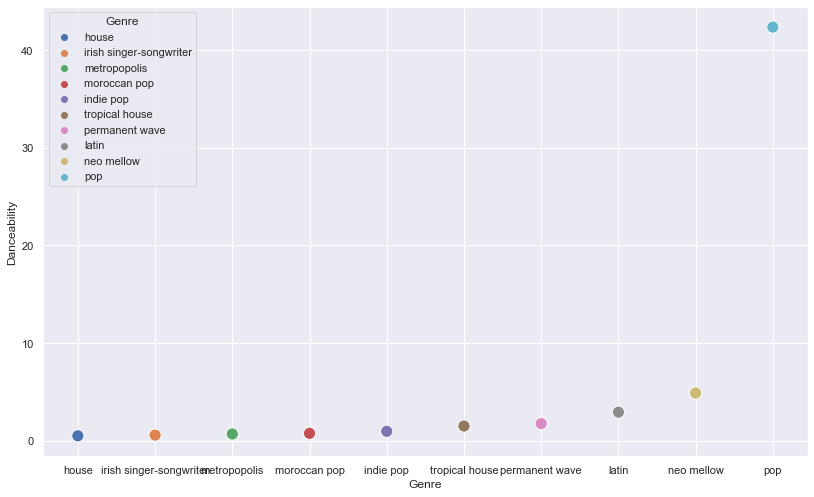

In [352]:
sns.scatterplot(data=df5,x='Genre',y='Danceability',s=150,hue='Genre',palette="deep")

(-0.5, 999.5, 599.5, -0.5)

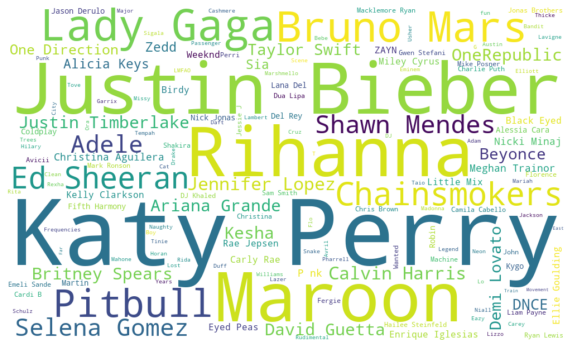

In [353]:
#Most frequent artist name using wordcloud
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 150,
                      background_color='white').generate(" ".join(df.artist))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [354]:
#Popular Genre based on number of tracks
df6 = pd.value_counts(df.Genre).reset_index().sort_values(['Genre']).rename(columns={'index':'Genre','Genre':'Number of Songs'})
df6 = df6.tail(15)
df6

,Genre,Number of Songs
14,atl hip hop,5
11,complextro,6
13,australian dance,6
12,hip pop,6
10,art pop,8
9,neo mellow,9
8,canadian contemporary r&b,9
7,big room,10
6,british soul,11
5,electropop,13


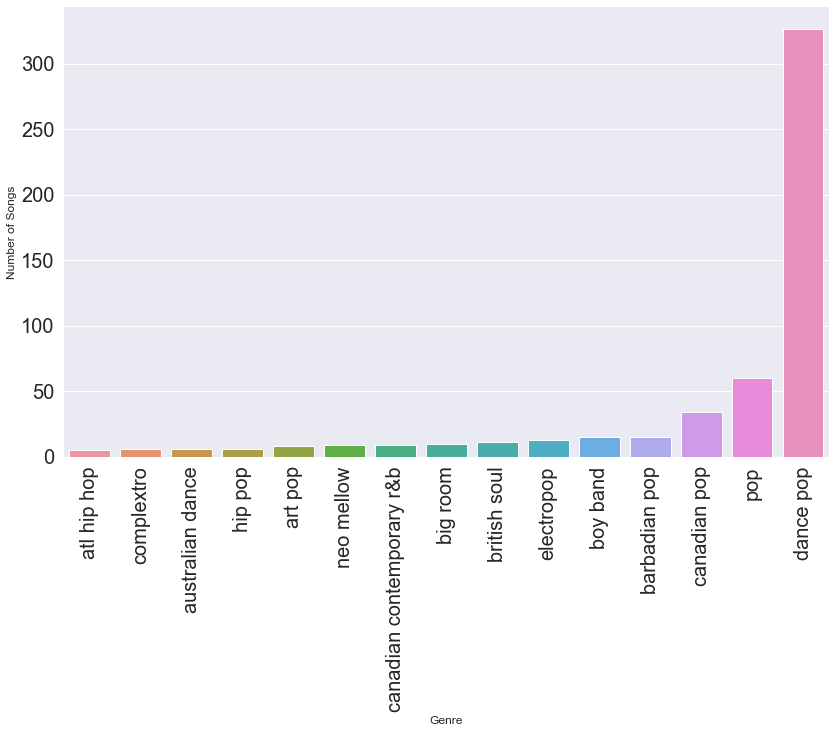

In [355]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.barplot(df6,x='Genre',y='Number of Songs')

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)

(-0.5, 999.5, 599.5, -0.5)

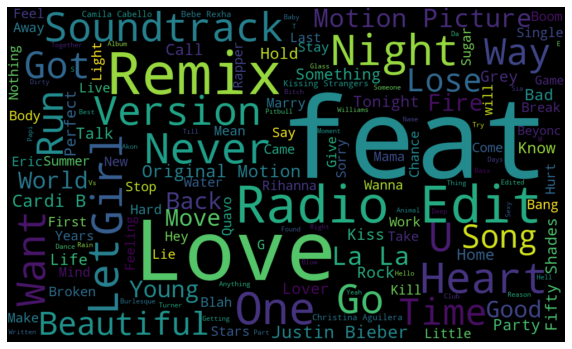

In [356]:
#Most frequent words in the title

wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 150,
                      background_color='black').generate(" ".join(df.title))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [357]:
#Top 10 songs based on Popularity
df7=df.groupby(by='title')['Popularity'].sum().reset_index().rename(columns={0:'Popular'}).sort_values(['Popularity'])
df7 = df7.tail(10)
df7

,title,Popularity
20,All I Ask,1.434343
103,Company,1.454545
311,Marry You,1.474747
459,Sugar,1.484848
219,I Like It,1.494949
536,We Are Never Ever Getting Back Together,1.515152
252,Just the Way You Are,1.575758
454,Stitches,1.575758
300,Love Yourself,1.676768
490,The Hills,1.696970


<AxesSubplot: xlabel='title', ylabel='Popularity'>

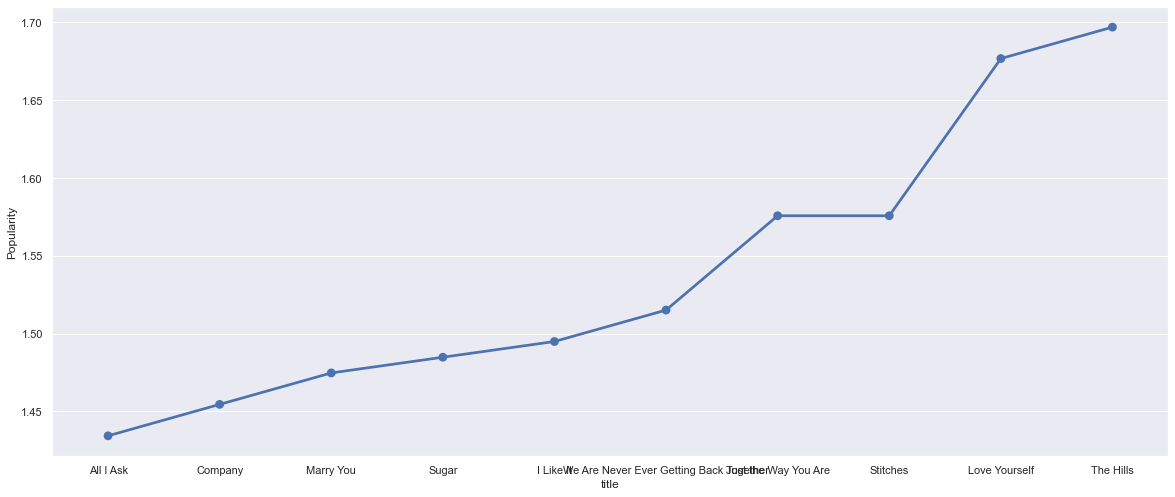

In [358]:
sns.set(font_scale=4)
sns.set(rc={'figure.figsize':(20,8.27)})
sns.pointplot(x='title',y = 'Popularity', data =df7)

In [359]:
cormat = df.corr()
round(cormat,2)

,year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
year,1.00,-0.10,-0.23,0.08,-0.13,-0.14,-0.12,-0.22,0.10,0.00,0.24
Tempo,-0.10,1.00,0.13,-0.13,0.18,0.08,0.02,-0.03,-0.11,0.06,0.02
Energy,-0.23,0.13,1.00,0.17,0.54,0.19,0.41,-0.14,-0.56,0.11,-0.06
Danceability,0.08,-0.13,0.17,1.00,0.23,-0.03,0.50,-0.18,-0.24,-0.03,0.12
Loudness,-0.13,0.18,0.54,0.23,1.00,0.08,0.28,-0.10,-0.19,-0.00,0.16
Liveness,-0.14,0.08,0.19,-0.03,0.08,1.00,0.02,0.10,-0.10,0.14,-0.08
Valence,-0.12,0.02,0.41,0.50,0.28,0.02,1.00,-0.26,-0.25,0.12,0.04
Duration,-0.22,-0.03,-0.14,-0.18,-0.10,0.10,-0.26,1.00,0.09,0.05,-0.10
Acousticness,0.10,-0.11,-0.56,-0.24,-0.19,-0.10,-0.25,0.09,1.00,0.00,0.03
Speechiness,0.00,0.06,0.11,-0.03,-0.00,0.14,0.12,0.05,0.00,1.00,-0.04


<AxesSubplot: >

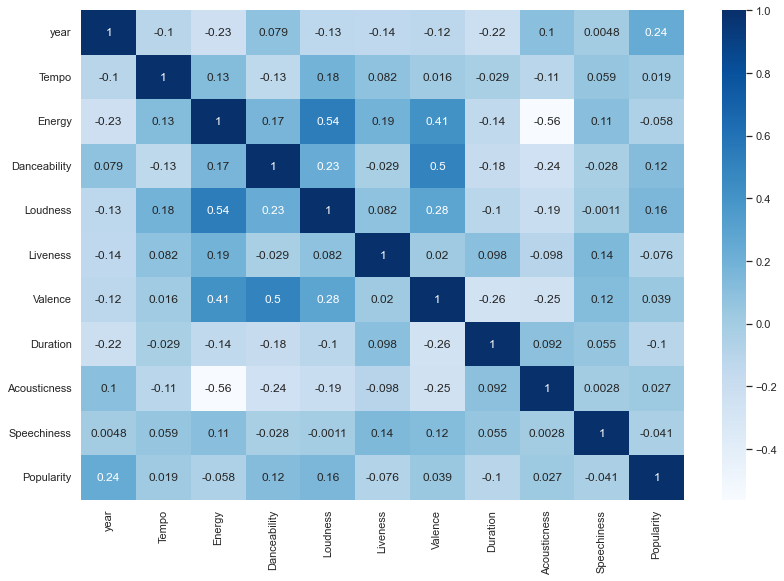

In [360]:
sns.set(rc={'figure.figsize':(13.5,9)})
sns.heatmap(cormat,annot=True,cmap='Blues')

In [361]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['title']= label_encoder.fit_transform(df['title'])
df['artist']= label_encoder.fit_transform(df['artist'])
df['Genre']= label_encoder.fit_transform(df['Genre'])

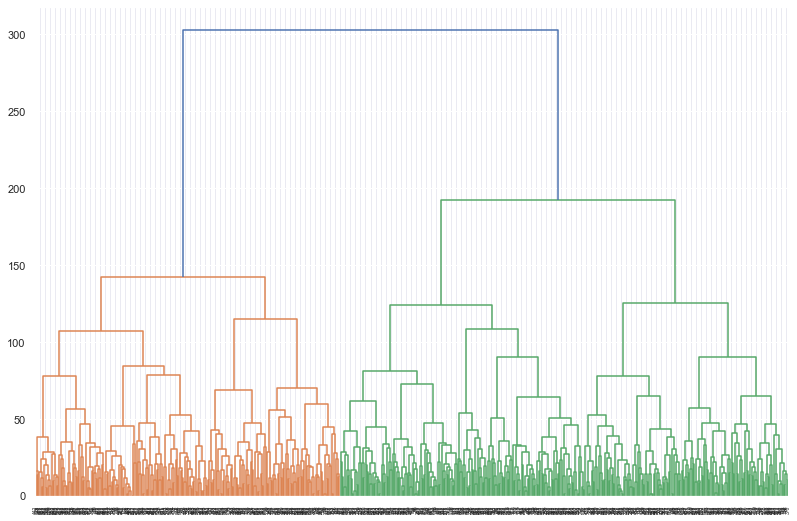

In [362]:
#Hierarchical clustering - average method
from scipy.cluster.hierarchy import dendrogram, linkage
link_method = linkage(df, method = 'average') #Average distance will be taken from each point in a cluster to another
dend = dendrogram(link_method) #Taken dendogram for the ease of division

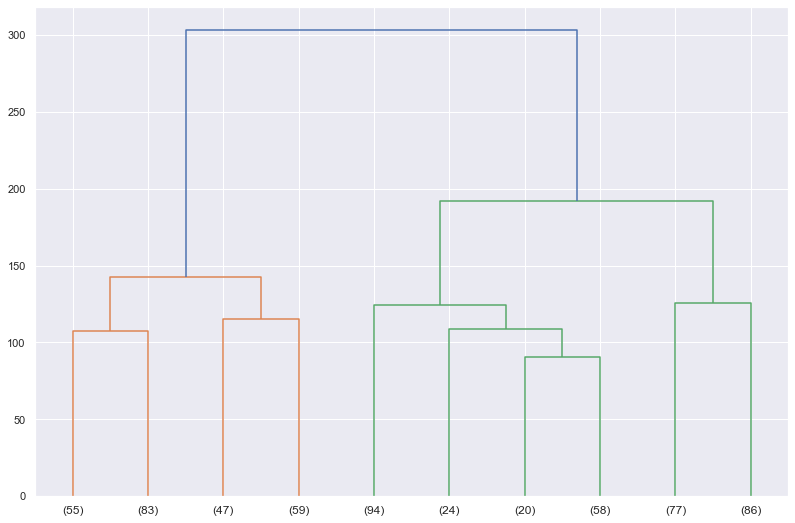

In [363]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)
#Setting the values of lastp to show last part of the clusters

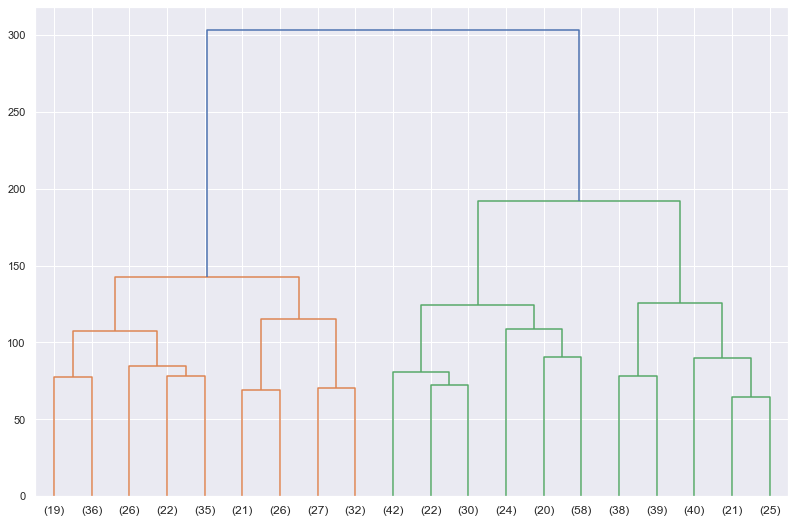

In [364]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 20)

In [365]:
from scipy.cluster.hierarchy import fcluster
clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3
#Creating an array of groups to differentiate

array([3, 3, 1, 2, 3, 2, 2, 1, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 2, 1, 3, 1,
       1, 3, 2, 2, 3, 3, 1, 2, 2, 1, 2, 3, 1, 1, 2, 3, 1, 2, 1, 2, 2, 3,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 2, 3, 3, 2,
       1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 3, 1, 1, 1, 3, 2,
       3, 3, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3,
       1, 2, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 3, 2, 3, 1, 2,
       2, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2, 3, 1, 3, 1, 1, 2, 3, 1,
       2, 3, 2, 3, 1, 1, 2, 3, 1, 3, 2, 3, 1, 2, 3, 1, 2, 1, 1, 2, 2, 3,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1,
       3, 1, 1, 1, 3, 3, 2, 3, 2, 1, 2, 1, 3, 1, 1, 1, 3, 1, 1, 2, 2, 1,
       2, 2, 1, 3, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1,
       2, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 3,

In [366]:
df['Hie_avg'] = clusters_3
df.head()

,title,artist,Genre,year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity,Hie_avg
0,202,174,46,2010,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333,0.838384,3
1,298,49,27,2010,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167,0.828283,3
2,502,89,25,2010,0.582524,0.857143,0.783505,0.982759,0.391892,0.724490,0.227586,0.101010,0.291667,0.808081,1
3,41,94,25,2010,0.577670,0.938776,0.721649,0.965517,0.108108,0.724490,0.555172,0.000000,0.083333,0.797980,2
4,252,20,48,2010,0.529126,0.857143,0.659794,0.948276,0.121622,0.438776,0.300000,0.020202,0.083333,0.787879,3


In [367]:
df['Hie_avg'].value_counts().sort_index()

1    244
2    196
3    163
Name: Hie_avg, dtype: int64

In [368]:
aggdata=df.groupby('Hie_avg').mean()
aggdata['Freq']=df['Hie_avg'].value_counts().sort_index()
aggdata
#Getting the values of aggregate data to show the mean values of each column and showing importance

,title,artist,Genre,year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity,Freq
Hie_avg,,,,,,,,,,,,,,,
1,464.139344,82.233607,24.926230,2014.594262,0.574029,0.707260,0.666934,0.935415,0.232000,0.547591,0.312719,0.153792,0.169570,0.680990,244
2,95.346939,96.903061,25.331633,2014.622449,0.577521,0.731154,0.659005,0.944581,0.235797,0.530664,0.317840,0.139817,0.173363,0.656411,196
3,268.349693,89.766871,27.460123,2014.552147,0.575138,0.723551,0.664537,0.935054,0.257752,0.513647,0.306389,0.137014,0.181876,0.677016,163


In [369]:
#Hierarchical Clustering - Ward method
wardlink = linkage(df, method = 'ward')

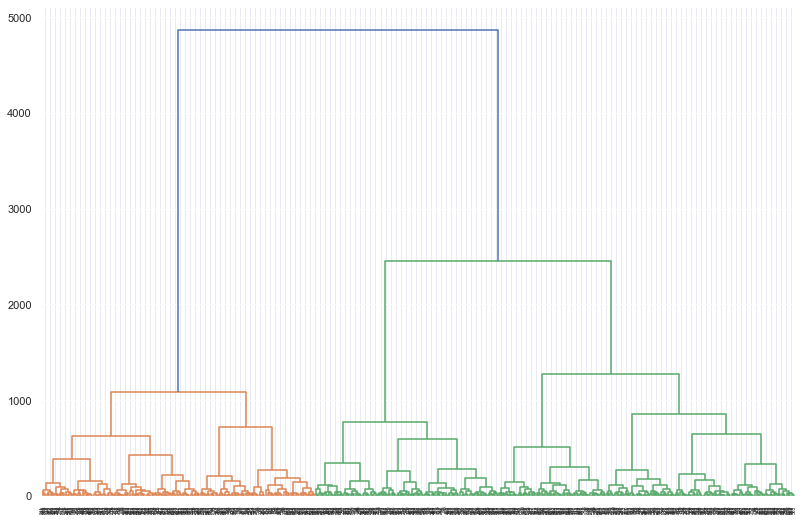

In [370]:
dend_wardlink = dendrogram(wardlink)

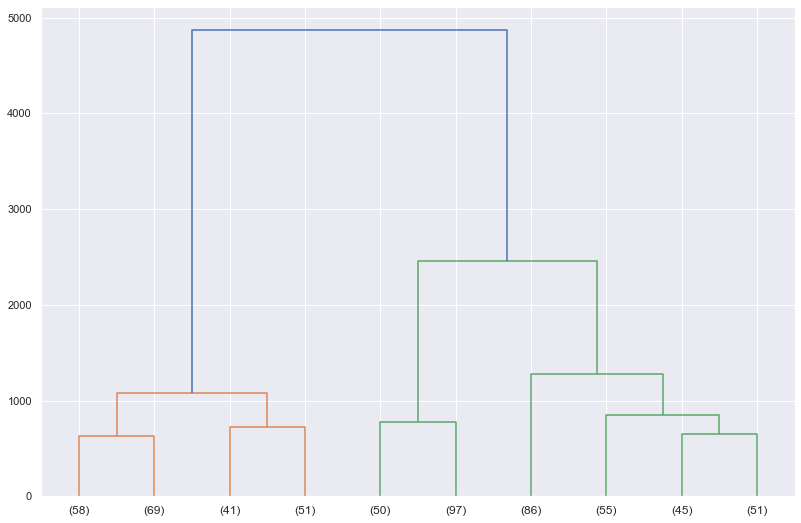

In [371]:
dend_wardlink = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [372]:
clusters_wdlk_3 = fcluster(wardlink, 3, criterion='maxclust')
clusters_wdlk_3

array([3, 3, 1, 2, 3, 2, 3, 1, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 2, 1, 3, 1,
       1, 3, 2, 2, 3, 3, 1, 2, 2, 3, 2, 3, 1, 1, 2, 3, 1, 2, 1, 2, 3, 3,
       1, 3, 1, 2, 2, 2, 3, 2, 1, 3, 3, 1, 1, 3, 3, 2, 1, 1, 2, 3, 3, 2,
       1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 3, 1, 1, 1, 3, 2,
       3, 3, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3,
       2, 3, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3,
       1, 3, 3, 1, 1, 3, 2, 1, 1, 1, 3, 3, 1, 1, 3, 2, 1, 3, 2, 3, 1, 2,
       2, 1, 1, 3, 3, 2, 3, 1, 3, 1, 2, 2, 3, 2, 3, 1, 3, 1, 1, 2, 3, 3,
       2, 3, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2, 2,
       1, 2, 3, 2, 3, 1, 3, 1, 3, 3, 3, 3, 2, 1, 1, 3, 1, 1, 2, 3, 3, 1,
       3, 1, 3, 1, 3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 1, 3, 1, 3, 2, 2, 3,
       2, 3, 1, 3, 1, 2, 1, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 3, 1, 1, 1, 1,
       2, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3,
       3, 3, 2, 2, 1, 2, 2, 3, 3, 3, 2, 2, 1, 3, 2,

In [373]:
cluster_w_3_dataset=df.copy()
cluster_w_3_dataset['Hie_ward'] = clusters_wdlk_3
cluster_w_3_dataset.head()

,title,artist,Genre,year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity,Hie_avg,Hie_ward
0,202,174,46,2010,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333,0.838384,3,3
1,298,49,27,2010,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167,0.828283,3,3
2,502,89,25,2010,0.582524,0.857143,0.783505,0.982759,0.391892,0.724490,0.227586,0.101010,0.291667,0.808081,1,1
3,41,94,25,2010,0.577670,0.938776,0.721649,0.965517,0.108108,0.724490,0.555172,0.000000,0.083333,0.797980,2,2
4,252,20,48,2010,0.529126,0.857143,0.659794,0.948276,0.121622,0.438776,0.300000,0.020202,0.083333,0.787879,3,3


In [389]:
cluster_w_3_dataset['Hie_ward'].value_counts().sort_index()

1    219
2    147
3    237
Name: Hie_ward, dtype: int64

In [388]:
new_df['Hierarchial_avg'] = df['Hie_avg']
new_df['Hierarchial_ward'] = cluster_w_3_dataset['Hie_ward']
new_df.head()

,title,artist,Genre,year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity,Hierarchial_avg,Hierarchial_ward
0,"Hey, Soul Sister",Train,neo mellow,2010,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333,0.838384,3,3
1,Love The Way You Lie,Eminem,detroit hip hop,2010,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167,0.828283,3,3
2,TiK ToK,Kesha,dance pop,2010,0.582524,0.857143,0.783505,0.982759,0.391892,0.724490,0.227586,0.101010,0.291667,0.808081,1,1
3,Bad Romance,Lady Gaga,dance pop,2010,0.577670,0.938776,0.721649,0.965517,0.108108,0.724490,0.555172,0.000000,0.083333,0.797980,2,2
4,Just the Way You Are,Bruno Mars,pop,2010,0.529126,0.857143,0.659794,0.948276,0.121622,0.438776,0.300000,0.020202,0.083333,0.787879,3,3


In [386]:
cluster1_tracks = new_df[new_df['Hierarchial_avg']==1]['title'].reset_index()
cluster1_tracks

,index,title
0,2,TiK ToK
1,7,Secrets
2,13,Telephone
3,17,The Time (Dirty Bit)
4,19,Your Love Is My Drug
...,...,...
239,588,Talk (feat. Disclosure)
240,590,Takeaway
241,594,No Guidance (feat. Drake)
242,596,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)"


In [385]:
cluster2_tracks = new_df[new_df['Hierarchial_avg']==2]['title'].reset_index()
cluster2_tracks

,index,title
0,3,Bad Romance
1,5,Baby
2,6,Dynamite
3,8,Empire State of Mind (Part II) Broken Down
4,10,Club Can't Handle Me (feat. David Guetta)
...,...,...
191,593,Call You Mine
192,595,Antisocial (with Travis Scott)
193,597,Con Calma - Remix
194,598,Find U Again (feat. Camila Cabello)


In [384]:
cluster3_tracks = new_df[new_df['Hierarchial_avg']==3]['title'].reset_index()
cluster3_tracks

,index,title
0,0,"Hey, Soul Sister"
1,1,Love The Way You Lie
2,4,Just the Way You Are
3,9,Only Girl (In The World)
4,11,Marry You
...,...,...
158,576,How Do You Sleep?
159,587,I Don't Care (with Justin Bieber)
160,589,Giant (with Rag'n'Bone Man)
161,601,Nothing Breaks Like a Heart (feat. Miley Cyrus)


In [391]:
cluster1_tracks1 = new_df[new_df['Hierarchial_ward']==1]['title'].reset_index()
cluster1_tracks1

,index,title
0,2,TiK ToK
1,7,Secrets
2,13,Telephone
3,17,The Time (Dirty Bit)
4,19,Your Love Is My Drug
...,...,...
214,583,Only Human
215,585,Sucker
216,588,Talk (feat. Disclosure)
217,590,Takeaway


In [393]:
cluster2_tracks2 = new_df[new_df['Hierarchial_ward']==2]['title'].reset_index()
cluster2_tracks2

,index,title
0,3,Bad Romance
1,5,Baby
2,8,Empire State of Mind (Part II) Broken Down
3,10,Club Can't Handle Me (feat. David Guetta)
4,12,Cooler Than Me - Single Mix
...,...,...
142,591,All Around The World (La La La)
143,593,Call You Mine
144,595,Antisocial (with Travis Scott)
145,597,Con Calma - Remix


In [394]:
cluster3_tracks3 = new_df[new_df['Hierarchial_ward']==3]['title'].reset_index()
cluster3_tracks3

,index,title
0,0,"Hey, Soul Sister"
1,1,Love The Way You Lie
2,4,Just the Way You Are
3,6,Dynamite
4,9,Only Girl (In The World)
...,...,...
232,594,No Guidance (feat. Drake)
233,598,Find U Again (feat. Camila Cabello)
234,600,"No Brainer (feat. Justin Bieber, Chance the Ra..."
235,601,Nothing Breaks Like a Heart (feat. Miley Cyrus)


Executing shutdown due to inactivity...


2022-12-07 02:01:30,897 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-12-07 02:01:35,005 - INFO     - Executing shutdown...


Exception on /shutdown [GET]
Traceback (most recent call last):
  File "C:\Users\chhar\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\chhar\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\chhar\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\chhar\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\chhar\anaconda3\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "C:\Users\chhar\anaconda3\lib\site-packages\dtale\app.py", line 421, in shutdown_server
    raise RuntimeError("Not running with the Werkzeug Server")
RuntimeError: Not running with the Werkzeug Server


2022-12-07 02:01:35,011 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "C:\Users\chhar\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\chhar\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\chhar\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\chhar\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\chhar\anaconda3\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "C:\Users\chhar\anaconda3\lib\site-packages\dtale\app.py", line 421, in shutdown_server
    raise RuntimeError("Not running with the Werkzeug Server")
RuntimeError: Not running with the Werkzeug Serv